###Import the libraries

In [ ]:
# Importing the necessary libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, f1_score, recall_score
from tabulate import tabulate

###Load the dataset
The dataset used in this notebook was sourced from Kaggle and it contains information of varoius Fertilizers.

In [ ]:
# Load the dataset

fer = pd.read_csv('/content/Fertilizer Prediction.csv')

*ATTRIBUTES DESCRIPTION:*


*   **Temparature -** 	Temperature in degree Celsius
*   **Humidity -** Relative Humdity (%)
*   **Moisture -** Ratio of the mass of water
*   **Soil Type -** Types of Soils
*   **Crop Type -** Type of Crops
*   **Nitrogen -** Amount of Nitrogen in Soil (%)
*   **Potassium -** Amount of Potassium in Soil (%)
*   **Phosphorous -** Amount of Phosphorous in Soil (%)
*   **Fertilizer Name -** Various types of Fertilizers used for different types of Soils & Crops




###Exploratory Data Analysis

In [ ]:
fer.head()

,Temparature,Humidity,Moisture,Soil Type,Crop Type,Nitrogen,Potassium,Phosphorous,Fertilizer Name
0,26,52,38,Sandy,Maize,37,0,0,Urea
1,29,52,45,Loamy,Sugarcane,12,0,36,DAP
2,34,65,62,Black,Cotton,7,9,30,14-35-14
3,32,62,34,Red,Tobacco,22,0,20,28-28
4,28,54,46,Clayey,Paddy,35,0,0,Urea


In [ ]:
fer.describe()

,Temparature,Humidity,Moisture,Nitrogen,Potassium,Phosphorous
count,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000
mean,30.282828,59.151515,43.181818,18.909091,3.383838,18.606061
std,3.502304,5.840331,11.271568,11.599693,5.814667,13.476978
min,25.000000,50.000000,25.000000,4.000000,0.000000,0.000000
25%,28.000000,54.000000,34.000000,10.000000,0.000000,9.000000
50%,30.000000,60.000000,41.000000,13.000000,0.000000,19.000000
75%,33.000000,64.000000,50.500000,24.000000,7.500000,30.000000
max,38.000000,72.000000,65.000000,42.000000,19.000000,42.000000


In [ ]:
fer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99 entries, 0 to 98
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Temparature      99 non-null     int64 
 1   Humidity         99 non-null     int64 
 2   Moisture         99 non-null     int64 
 3   Soil Type        99 non-null     object
 4   Crop Type        99 non-null     object
 5   Nitrogen         99 non-null     int64 
 6   Potassium        99 non-null     int64 
 7   Phosphorous      99 non-null     int64 
 8   Fertilizer Name  99 non-null     object
dtypes: int64(6), object(3)
memory usage: 7.1+ KB


In [ ]:
fer.columns

Index(['Temparature', 'Humidity ', 'Moisture', 'Soil Type', 'Crop Type',
       'Nitrogen', 'Potassium', 'Phosphorous', 'Fertilizer Name'],
      dtype='object')

In [ ]:
fer['Fertilizer Name'].unique()

array(['Urea', 'DAP', '14-35-14', '28-28', '17-17-17', '20-20',
       '10-26-26'], dtype=object)

In [ ]:
# Finding the shape of the dataset

fer.shape

(99, 9)

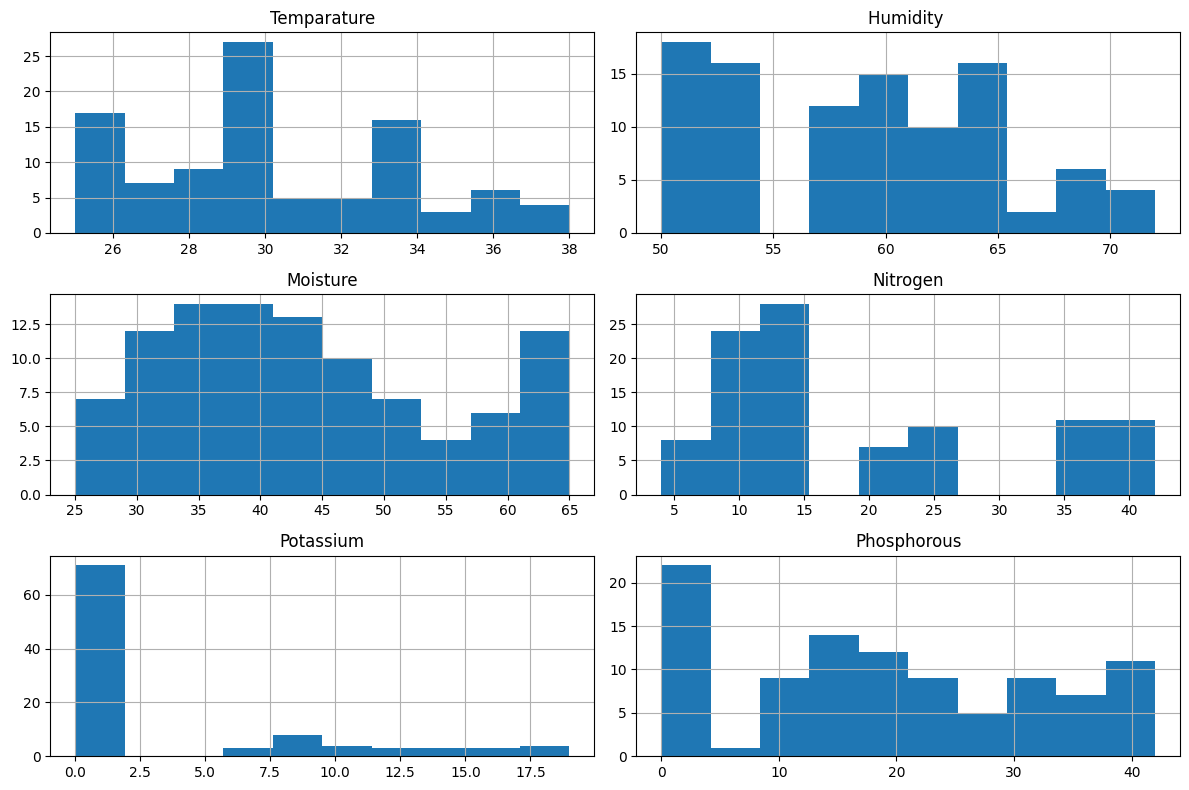

In [ ]:
fer.hist(figsize=(12, 8))
plt.tight_layout()
plt.show()

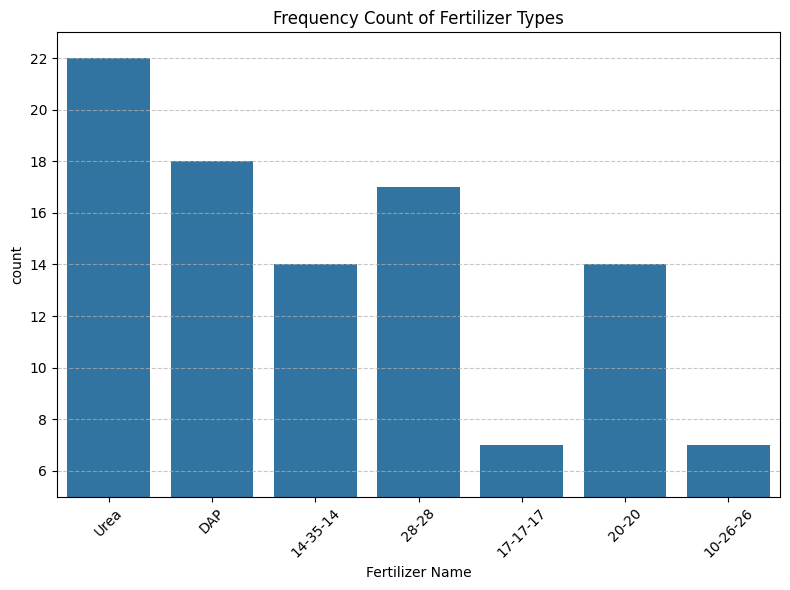

In [ ]:
# Bar plot of 'Fertilizer Name'

plt.figure(figsize=(8, 6))
sns.countplot(x='Fertilizer Name', data=fer)
plt.title('Frequency Count of Fertilizer Types')
plt.xticks(rotation=45)
plt.ylim(5, 23)  # Set y-axis limit to ensure all accuracies are visible
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Add gridlines for better visualization
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()

From the above bar plot, there are higher number of instances with 'Urea' which suggests that *urea is the most commonly used fertilizer* in the dataset.

###Data Preprocessing

In [ ]:
# Checking for missing values

fer.isnull().sum()

Temparature        0
Humidity           0
Moisture           0
Soil Type          0
Crop Type          0
Nitrogen           0
Potassium          0
Phosphorous        0
Fertilizer Name    0
dtype: int64

In [ ]:
# Encoding categorical column into numerical

from sklearn.preprocessing import LabelEncoder
le= LabelEncoder()
fer['Fertilizer Name']= le.fit_transform(fer['Fertilizer Name'])
fer['Soil Type']= le.fit_transform(fer['Soil Type'])
fer['Crop Type']= le.fit_transform(fer['Crop Type'])

In [ ]:
fer

,Temparature,Humidity,Moisture,Soil Type,Crop Type,Nitrogen,Potassium,Phosphorous,Fertilizer Name
0,26,52,38,4,3,37,0,0,6
1,29,52,45,2,8,12,0,36,5
2,34,65,62,0,1,7,9,30,1
3,32,62,34,3,9,22,0,20,4
4,28,54,46,1,6,35,0,0,6
...,...,...,...,...,...,...,...,...,...
94,25,50,32,1,7,24,0,19,4
95,30,60,27,3,9,4,17,17,0
96,38,72,51,2,10,39,0,0,6
97,36,60,43,4,4,15,0,41,5


In [ ]:
# Extracting independent and dependent variables

x= fer.iloc[:,:-1].values
y= fer.iloc[:,-1].values

Auto Data Split

In [ ]:
# Auto Data Split

def performance(x_train, x_test, y_train, y_test, classifier):
    classifier.fit(x_train, y_train)
    y_pred = classifier.predict(x_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    return accuracy, precision, recall, f1

def find_optimal_split_ratio(x, y, classifiers, splitting_ratios):
    optimal_ratio = None
    max_accuracy = 0.0
    header = ["Test Ratio", "Classifier", "Accuracy", "Precision", "Recall", "F1-score"]
    table_data = []
    for test_ratio in splitting_ratios:
        x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=test_ratio, random_state=42)
        for classifier_name, classifier in classifiers.items():
            accuracy, precision, recall, f1 = performance(x_train, x_test, y_train, y_test, classifier)
            row_data = [f"{test_ratio:.2f}", classifier_name,
                        f"{accuracy:.4f}", f"{precision:.4f}",
                        f"{recall:.4f}", f"{f1:.4f}"]
            table_data.append(row_data)
            if accuracy > max_accuracy:
                max_accuracy = accuracy
                optimal_ratio = test_ratio
    print("\nOptimal Splitting Ratio:", optimal_ratio)
    print(tabulate(table_data, headers=header, tablefmt="grid"))

In [ ]:
# Define the classifiers

classifiers = {'Random Forest': RandomForestClassifier(),
              'Support Vector Machine': SVC(),
              'Decision Tree': DecisionTreeClassifier(),
              'KNN': KNeighborsClassifier()
              }

In [ ]:
# Define Splitting ratios to evaluate

splitting_ratios = np.linspace(0.1, 0.9)

In [ ]:
#find the optimal splitting ratio

find_optimal_split_ratio(x, y, classifiers, splitting_ratios)

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall


Optimal Splitting Ratio: 0.1
+--------------+------------------------+------------+-------------+----------+------------+
|   Test Ratio | Classifier             |   Accuracy |   Precision |   Recall |   F1-score |
+==============+========================+============+=============+==========+============+
|         0.1  | Random Forest          |     1      |      1      |   1      |     1      |
+--------------+------------------------+------------+-------------+----------+------------+
|         0.1  | Support Vector Machine |     0.9    |      0.9    |   0.9    |     0.9    |
+--------------+------------------------+------------+-------------+----------+------------+
|         0.1  | Decision Tree          |     1      |      1      |   1      |     1      |
+--------------+------------------------+------------+-------------+----------+------------+
|         0.1  | KNN                    |     1      |      1      |   1      |     1      |
+--------------+------------------------

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning

###Model Building

In [ ]:
# Splitting into train and test set

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.19, random_state = 42)

In [ ]:
# RandomForestClassifier

rfc = RandomForestClassifier(n_estimators=100, criterion='entropy', max_depth=50, min_samples_split=20, random_state=42)
rfc.fit(x_train, y_train)
y_pred1 = rfc.predict(x_test)

In [ ]:
print('Random Forest Classifier\n')
rfc_acc = accuracy_score(y_test, y_pred1)
print(f'Accuracy: {rfc_acc}')
rfc_precision = precision_score(y_test, y_pred1, average='weighted')
print(f'Precision: {rfc_precision}')
rfc_recall = recall_score(y_test, y_pred1, average='weighted')
print(f'Recall: {rfc_recall}')
rfc_f1 = f1_score(y_test, y_pred1, average='weighted')
print(f'F1-score: {rfc_f1}')

Random Forest Classifier

Accuracy: 0.8947368421052632
Precision: 0.8596491228070174
Recall: 0.8947368421052632
F1-score: 0.868421052631579


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
# KNeighbors Classifier

knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(x_train, y_train)
y_pred2 = knn.predict(x_test)

In [ ]:
print('K-Nearest Neighbor\n')
knn_acc = accuracy_score(y_test, y_pred2)
print(f'Accuracy: {knn_acc}')
knn_precision = precision_score(y_test, y_pred2, average='weighted', zero_division='warn')
print(f'Precision: {knn_precision}')
knn_recall = recall_score(y_test, y_pred2, average='weighted', zero_division='warn')
print(f'Recall: {knn_recall}')
knn_f1 = f1_score(y_test, y_pred2, average='weighted')
print(f'F1-score: {knn_f1}')

K-Nearest Neighbor

Accuracy: 0.8421052631578947
Precision: 0.8421052631578947
Recall: 0.8421052631578947
F1-score: 0.8304093567251463


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
# Support Vector Classsifier

svm= SVC(kernel = 'poly', degree = 10, random_state=42)
svm.fit(x_train, y_train)
y_pred3 = svm.predict(x_test)

In [ ]:
print('Support Vector Classifier\n')
svm_acc = accuracy_score(y_test, y_pred3)
print(f'Accuracy: {svm_acc}')
svm_precision = precision_score(y_test, y_pred3, average='weighted')
print(f'Precision: {svm_precision}')
svm_recall = recall_score(y_test, y_pred3, average='weighted')
print(f'Recall: {svm_recall}')
svm_f1 = f1_score(y_test, y_pred3, average='weighted')
print(f'F1-score: {svm_f1}')

Support Vector Classifier

Accuracy: 0.9473684210526315
Precision: 0.9561403508771931
Recall: 0.9473684210526315
F1-score: 0.946836788942052


In [ ]:
# Decision Tree Classifier

dt = DecisionTreeClassifier(max_depth = 5, random_state=42)
dt.fit(x_train, y_train)
y_pred4 = dt.predict(x_test)

In [ ]:
print('Decision Tree Classifier\n')
dt_acc = accuracy_score(y_test, y_pred4)
print(f'Accuracy: {dt_acc}')
dt_precision = precision_score(y_test, y_pred4, average='weighted', zero_division='warn')
print(f'Precision: {dt_precision}')
dt_recall = recall_score(y_test, y_pred4, average='weighted', zero_division='warn')
print(f'Recall: {dt_recall}')
dt_f1 = f1_score(y_test, y_pred4, average='weighted')
print(f'F1-score: {dt_f1}')

Decision Tree Classifier

Accuracy: 0.8947368421052632
Precision: 0.8947368421052632
Recall: 0.8947368421052632
F1-score: 0.8947368421052632


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))





*   Random forest Classifier followed with an accuracy of **0.894**

*   K Neighbors Classifier has an accuracy of **0.842**
*   Support Vector Classsifier follows as accuracy of **0.947**
*   Decision Tree Model has an accuracy of **0.894**






The *Support Vector Classifier* showed the highest accuracy of **94%** among the models tested, making it more effective model for predicting fertilizer recommendations for the given dataset.